# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Noncoherent Integration
***

Referring to Section 6.2.2, noncoherent integration shown in Figure6.8.  Noncoherent processing does not make use of phase information.  Pulse integration is performed after the signal amplitude of each pulse has been found (i.e., after the signal has passed through the envelope detector).

Noncoherent integration is less efficient than coherent integration and much work has been performed in this area to characterize the degradation in performance. While closed-form expressions generally do not exist, there are some empirical approximations.  One approach is to write the degradation as a loss factor compared to coherent integration as (Equation 6.19)

$$
    {SNR}_{{nci}} = \frac{{SNR}_{{ci}}}{L_{{nci}}},
$$

where ${SNR}_{{nci}}$ is the signal-to-noise ratio resulting from noncoherent integration and $L_{nci}}$ is the loss in integration as compared to coherent integration.  One approximation for this loss factor is given as (Equation 6.20)

$$
    L_{{nci}} = \frac{1 + {SNR}_0}{{SNR}_0},
$$

where ${SNR}_0$ is the required single pulse signal-to-noise ratio for noncoherent detection. An expression for finding the single pulse signal-to-noise ratio given the number of pulses and signal-to-noise required to produce a specific probability of detection and probability of false alarm is written as (Equation 6.21)

$$
    {SNR}_0 = \frac{{SNR}_{{nci}}}{2 N} + \sqrt{\frac{{SNR}_{{nci}}^2}{4 N^2} + \frac{{SNR}_{{nci}}}{N}}.
$$

Another approach is to express the signal-to-noise ratio for noncoherent integration as a gain over the single pulse signal-to-noise ratio.  Sometimes in literature this is referred to as the noncoherent integration improvement factor.  In this case, the signal-to-noise ratio is (Equation 6.22)

$$
    {SNR}_{{nci}} = G_{{nci}} + {SNR}_0 \hspace{0.5in}\text{(dB)},
$$

where $G_{{nci}}$ is the noncoherent integration gain, and ${SNR}_0$ is the single pulse signal-to-noise ratio.  An approximation for $G_{{nci}}$ which has been shown to be accurate within $0.8$ dB is (Equation 6.23)

$$
    G_{{nci}} = 6.79\, (1 + 0.235\, P_d)  \left[1 + \frac{ \log_{10}(1/P_{fa})}{46.6} \right] \log_{10}(N) \times \big[1 - 0.14 \log_{10}(N) + 0.01831 \log_{10}^2(N) \big] \hspace{0.5in} \text{(dB)}.
$$
***

Begin by getting the library path

In [1]:
import lib_path

Set the signal to noise ration (dB), the probability of false alarm, and the number of pulses.

In [2]:
from scipy import linspace


snr_db = [-4.0, 20.0]

snr = 10.0 ** (linspace(snr_db[0], snr_db[1], 200) / 10.0)

pfa = 1e-9

number_of_pulses = 10

Set the target type (Swerling 0 - Swerling 4)

In [3]:
target_type = 'Swerling 1'

Calculate the probability of detection using the `probability_of_detection` routine

In [4]:
from Libs.detection.non_coherent_integration import probability_of_detection

pd = [probability_of_detection(s, pfa, number_of_pulses, target_type) for s in snr]

Display the probability of detection for coherent detection using the `matplotlib` routines

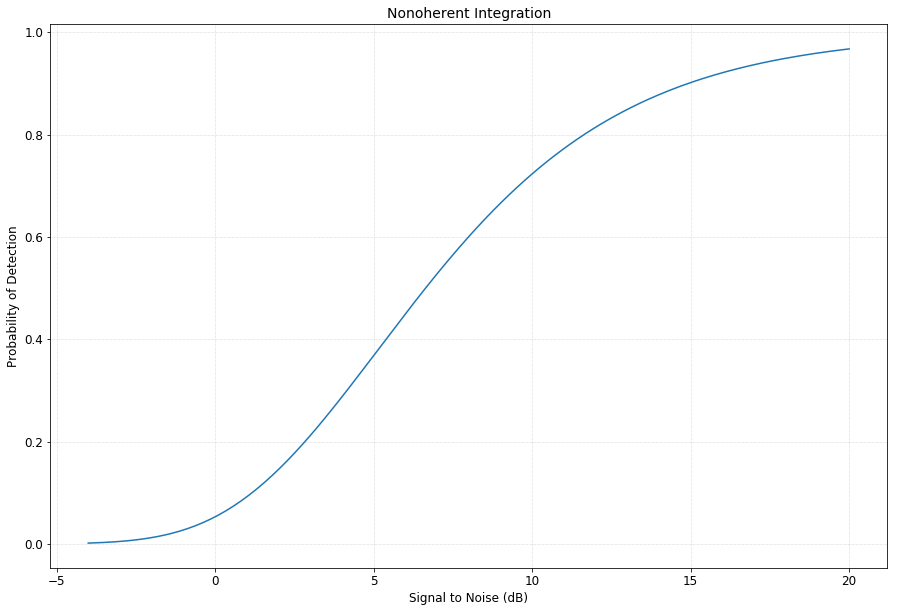

In [6]:
from matplotlib import pyplot as plt

from scipy import log10

# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)




# Display the results

plt.plot(10.0 * log10(snr), pd, '')



# Set the plot title and labels

plt.title('Nonoherent Integration', size=14)

plt.xlabel('Signal to Noise (dB)', size=12)

plt.ylabel('Probability of Detection', size=12)



# Set the tick label size

plt.tick_params(labelsize=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)